## Neural network from scratch

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class NeuralNet():
    def __init__(self, learning_rate=0.01, reg_lambda=0.01, nn_hdim=3, num_iter=2000, print_loss=True):
        self.learning_rate = learning_rate
        self.reg_lambda = reg_lambda
        self.nn_hdim = nn_hdim
        self.num_iter = num_iter
        self.print_loss = print_loss
        
        #print(self.learning_rate, self.reg_lambda)

    def _calculate_loss(self, weights, X, y):
        W1, b1, W2, b2 = weights['W1'], weights['b1'], weights['W2'], weights['b2']
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        corect_logprobs = -np.log(probs[range(self.num_examples), y])
        data_loss = np.sum(corect_logprobs)
        data_loss += self.reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
        
        return 1./self.num_examples * data_loss


    def fit(self, X, y):
        nn_hdim = self.nn_hdim
        reg_lambda = self.reg_lambda
        epsilon = self.learning_rate
        nn_input_dim = X.shape[1]
        nn_output_dim = len(np.unique(y))
        self.num_examples = len(X)
        
        np.random.seed(0)
        W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
        b1 = np.zeros((1, nn_hdim))
        W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
        b2 = np.zeros((1, nn_output_dim))
        
        weights = {}
        
        for i in range(0, self.num_iter):

        # Forward propagation
            z1 = X.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            
        # Backpropagation
            delta3 = probs
            delta3[range(self.num_examples), y] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X.T, delta2)
            db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1

        # Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2
        
        # Assign new parameters to the weights
            weights = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if self.print_loss and i % 100 == 0:
                print("Loss after iteration %i: %f" %(i, self._calculate_loss(weights, X, y)))
                
        self.weights = weights 
    
    def predict(self, X):
        weights = self.weights
        W1, b1, W2, b2 = weights['W1'], weights['b1'], weights['W2'], weights['b2']
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return np.argmax(probs, axis=1)
    

Loss after iteration 0: 1.094907
Loss after iteration 100: 0.228873
Loss after iteration 200: 0.119610
Loss after iteration 300: 0.230335
Loss after iteration 400: 0.109517
Loss after iteration 500: 0.108173
Loss after iteration 600: 0.107117
Loss after iteration 700: 0.103000
Loss after iteration 800: 0.102536
Loss after iteration 900: 0.102116
Loss after iteration 1000: 0.101705
Loss after iteration 1100: 0.101247
Loss after iteration 1200: 0.100617
Loss after iteration 1300: 0.099585
Loss after iteration 1400: 0.095598
Loss after iteration 1500: 0.089473
Loss after iteration 1600: 0.089298
Loss after iteration 1700: 0.089160
Loss after iteration 1800: 0.089040
Loss after iteration 1900: 0.088933


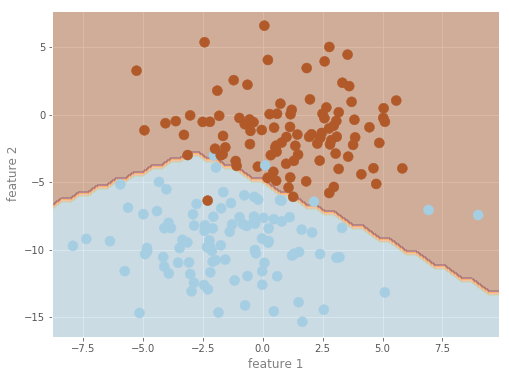

In [3]:
from tools.plot import plot_class
clf = NeuralNet()
plot_class(clf)